# VENDAS EM 3 FILIAIS DE SUPERMERCADO

### Local
Dataset disponível em Kaggle: https://www.kaggle.com/aungpyaeap/supermarket-sales

### Contexto

    O conjunto de dados é um dos históricos de vendas de uma empresa de supermercado 
    que registrou em 3 filiais diferentes para dados de 3 meses.
    Dados disponiveis em 2019.

### Colunas

- Invoice id: Número de identificação da fatura do recibo de venda gerado por computador
- Branch: Filial da empresa  (estão disponíveis 3 filiais identificadas por A, B e C).
- City: Localização dos supercentros
- Customer type: Tipo de cliente, registado pelos Membros para clientes com cartão de sócio e Normal para sem cartão de sócio.
- Gender: Tipo de gênero do cliente
- Product line: Grupos de categorização geral de itens - Acessórios eletrônicos, Acessórios de moda, Alimentos e bebidas, Saúde e beleza, Casa e estilo de vida, Esportes e viagens
- Unit price: Preço de cada produto em $
- Quantity: Número de produtos adquiridos por
- Tax: taxa de imposto de 5% para compra do cliente
- Total: preço total incluindo imposto
- Date: Data da compra (Registro disponível de janeiro de 2019 a março de 2019)
- Time: Horário da compra (10h às 21h)
- Payment: Pagamento usado pelo cliente para a compra (3 métodos disponíveis - Dinheiro, Cartão de crédito e Ewallet)
- COGS: Custo das mercadorias Vendido
- Gross margin percentage: Porcentagem da margem
- Gross income: Renda bruta
- Rating: Classificação de estratificação do cliente em sua experiência geral de compra (em uma escala de 1 a 10)

### Importações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# aviso de falso positivo em copy dataframe
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

### Leitura Dataset 

In [2]:
df_supermarket = pd.read_csv(r'datasets\supermarket_sales - Sheet1.csv')
df_supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Verificação Nulos

In [3]:
df_supermarket.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [4]:
df_supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


##### Conversões

In [5]:
df_supermarket['Date'] = pd.to_datetime(df_supermarket['Date'], dayfirst=True)

In [6]:
df_supermarket['Date'].head()

0   2019-05-01
1   2019-08-03
2   2019-03-03
3   2019-01-27
4   2019-08-02
Name: Date, dtype: datetime64[ns]

# Analise Exploratória

##### Media e Mediana de classificação dos usuarios por datas

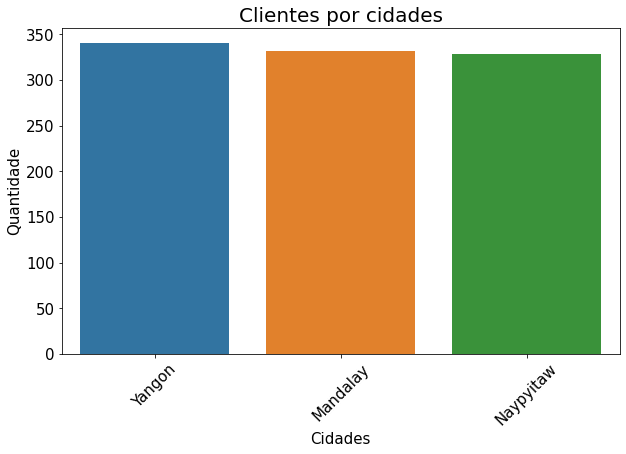

In [7]:
df_qtd_citys = df_supermarket['City'].value_counts().rename('Quantity').reset_index()

plt.figure(figsize=(10, 6))    
sns.barplot(x='index', y='Quantity', data=df_qtd_citys)

plt.xlabel('Cidades', fontsize=15)
plt.xticks(rotation=45, fontsize=15)

plt.ylabel('Quantidade', fontsize=15)
plt.yticks(fontsize=15)

plt.title(f'Clientes por cidades', fontsize=20)
plt.show();

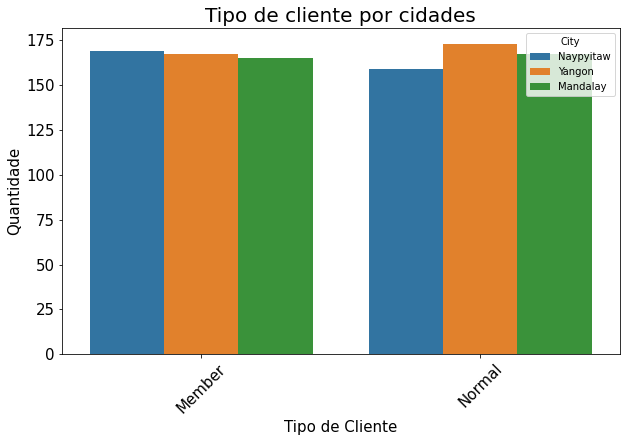

In [8]:
df_customers_citys = df_supermarket.groupby('Customer type')['City'].value_counts().rename('Quantity').reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Customer type', y='Quantity', hue='City', data=df_customers_citys)

plt.xlabel('Tipo de Cliente', fontsize=15)
plt.xticks(rotation=45, fontsize=15)

plt.ylabel('Quantidade', fontsize=15)
plt.yticks(fontsize=15)

plt.title(f'Tipo de cliente por cidades', fontsize=20)
plt.show();

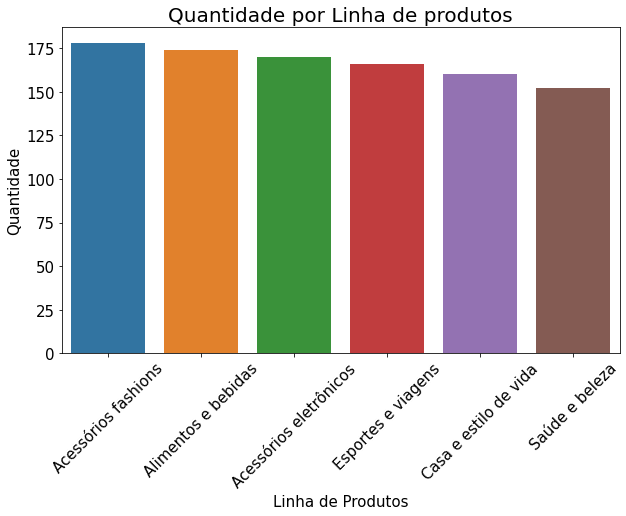

In [9]:
df_product_line = df_supermarket['Product line'].value_counts().rename('Quantity').reset_index()
product_line = ['Acessórios fashions', 'Alimentos e bebidas', 'Acessórios eletrônicos',
                'Esportes e viagens', 'Casa e estilo de vida', 'Saúde e beleza']
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Quantity', data=df_product_line)

plt.xlabel('Linha de Produtos', fontsize=15)
plt.xticks(ticks=df_product_line.index, labels=product_line, rotation=45, fontsize=15)

plt.ylabel('Quantidade', fontsize=15)
plt.yticks(fontsize=15)

plt.title(f'Quantidade por Linha de produtos', fontsize=20)
plt.show();

In [10]:
df_supermarket[['Date', 'Rating']].head(5)

,Date,Rating
0,2019-05-01,9.1
1,2019-08-03,9.6
2,2019-03-03,7.4
3,2019-01-27,8.4
4,2019-08-02,5.3


In [11]:
df_rating_mean = df_supermarket.groupby(['Date'])['Rating'].mean().rename('Mean').reset_index()
df_rating_median = df_supermarket.groupby(['Date'])['Rating'].median().rename('Median').reset_index()

rating_mean_median = pd.merge(df_rating_mean, df_rating_median, how='inner', on='Date')

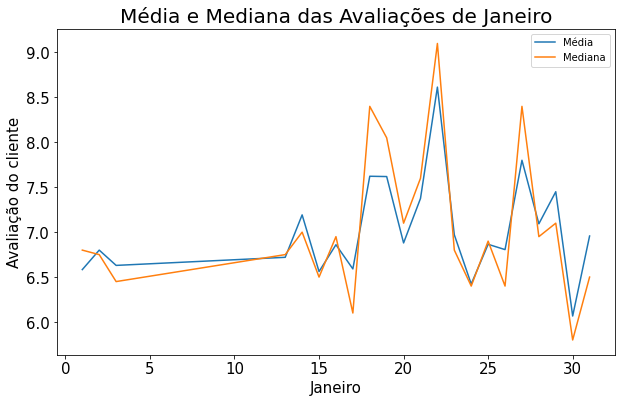

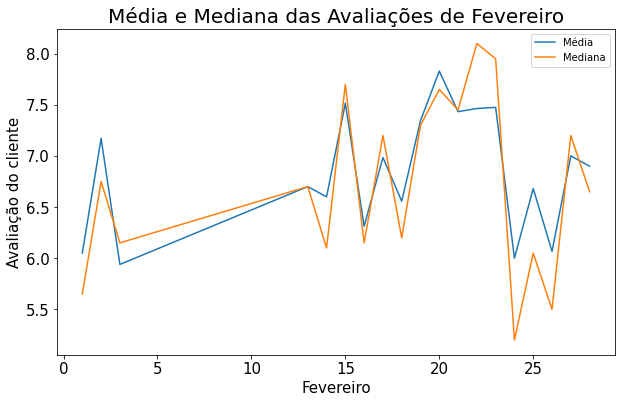

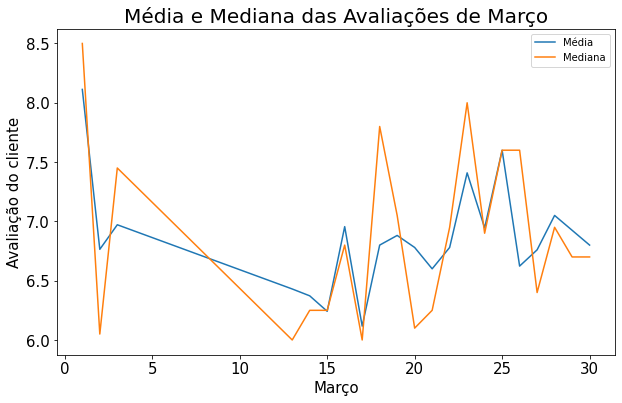

In [12]:
xlabel = [None, 'Janeiro', 'Fevereiro', 'Março']
ylabel = 'Avaliação do cliente'
legend = ['Média', 'Mediana']

for i in range(1, 4):
    plt.figure(figsize=(10, 6))
    new_df = rating_mean_median.loc[rating_mean_median['Date'].dt.month == i]
    new_df['Date'] = new_df['Date'].dt.day
    
    sns.lineplot(x='Date', y='Mean', data=new_df)
    sns.lineplot(x='Date', y='Median', data=new_df)
    
    plt.legend(legend)
    plt.ylabel(ylabel, fontsize=15)
    plt.yticks(fontsize=15)

    plt.xlabel(xlabel[i], fontsize=15)
    plt.xticks(fontsize=15)
    
    plt.title(f'Média e Mediana das Avaliações de {xlabel[i]}', fontsize=20)
    plt.show();

In [13]:
df_supermarket[['Tax 5%', 'Total']].head(5)

,Tax 5%,Total
0,26.1415,548.9715
1,3.8200,80.2200
2,16.2155,340.5255
3,23.2880,489.0480
4,30.2085,634.3785


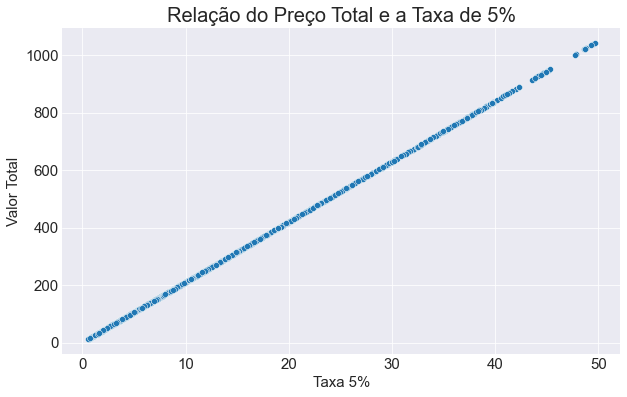

In [14]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')

sns.scatterplot(x='Tax 5%', y='Total', data=df_supermarket)

plt.xlabel('Taxa 5%', fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel('Valor Total', fontsize=15)
plt.yticks(fontsize=15)

plt.title('Relação do Preço Total e a Taxa de 5%', fontsize=20)
plt.show();

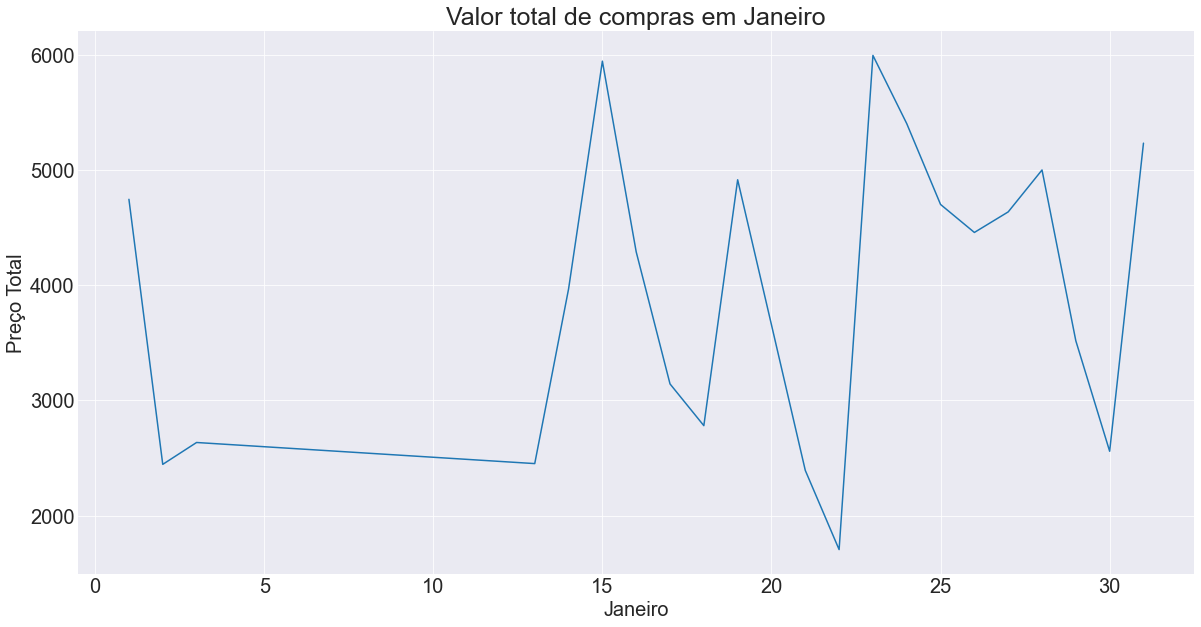

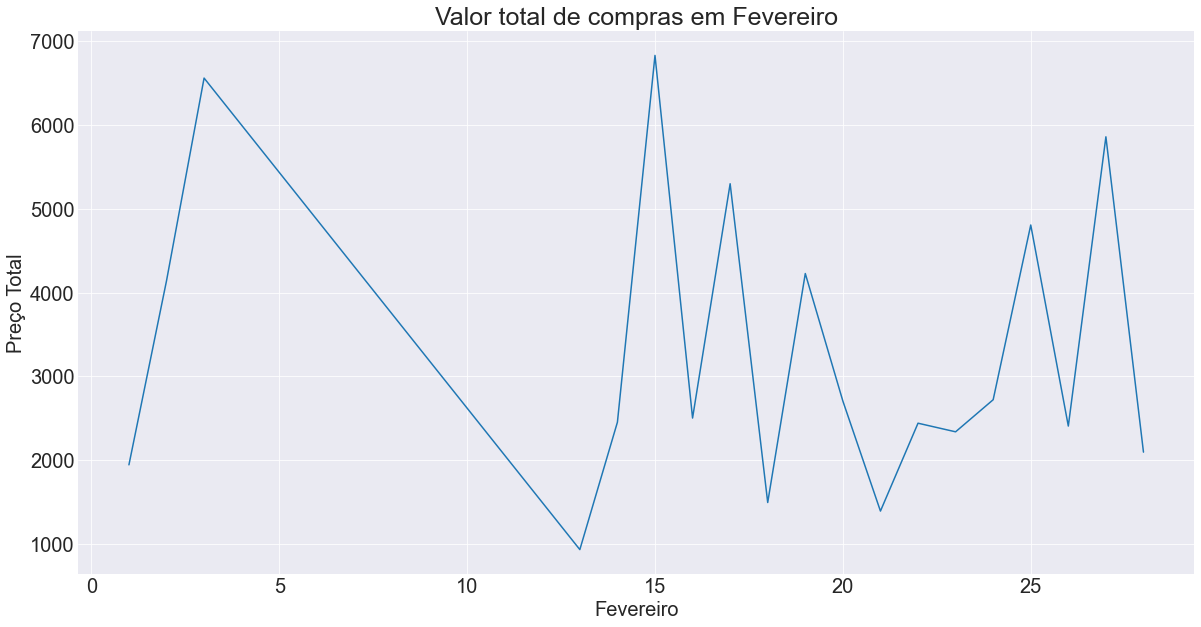

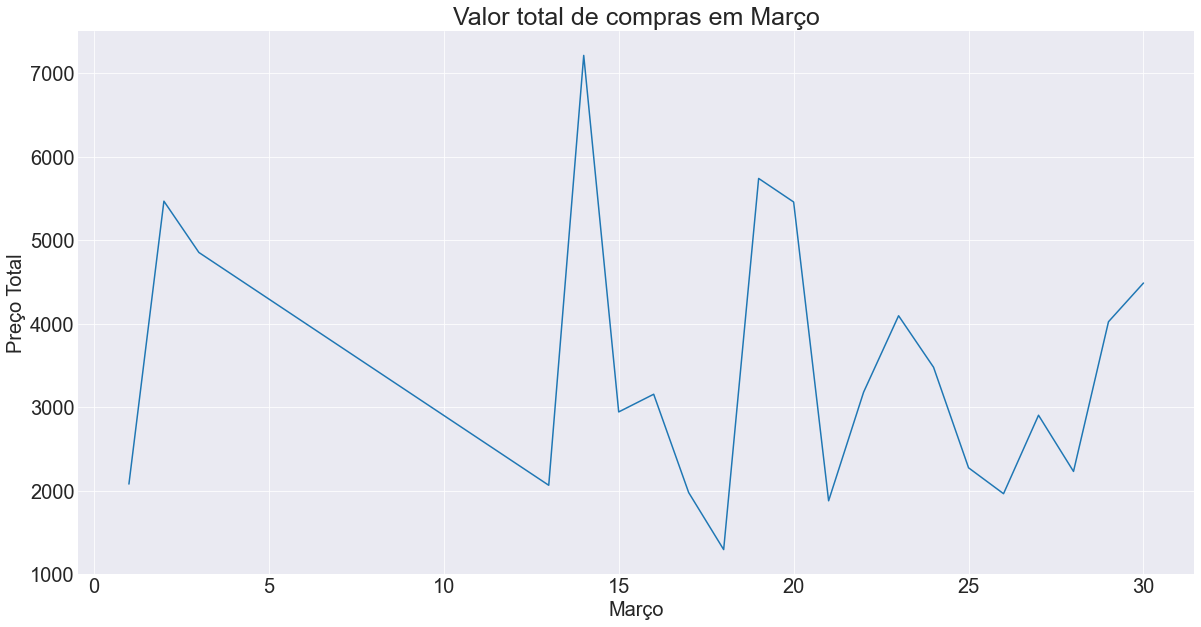

In [15]:
xlabel = [None, 'Janeiro', 'Fevereiro', 'Março']

for i in range(1, 4):
    plt.figure(figsize=(20, 10))

    new_df2 = df_supermarket.loc[df_supermarket['Date'].dt.month == i]
    new_df2 = new_df2.groupby(['Date'])['Total'].sum().reset_index()
    new_df2['Date'] = new_df2['Date'].dt.day
    
    sns.lineplot(x='Date', y='Total', data=new_df2, palette='flare')

    plt.xlabel(xlabel[i], fontsize=20)
    plt.xticks(fontsize=20)

    plt.ylabel('Preço Total', fontsize=20)
    plt.yticks(fontsize=20)
    
    plt.title(f'Valor total de compras em {xlabel[i]}', fontsize=25)
    plt.show();

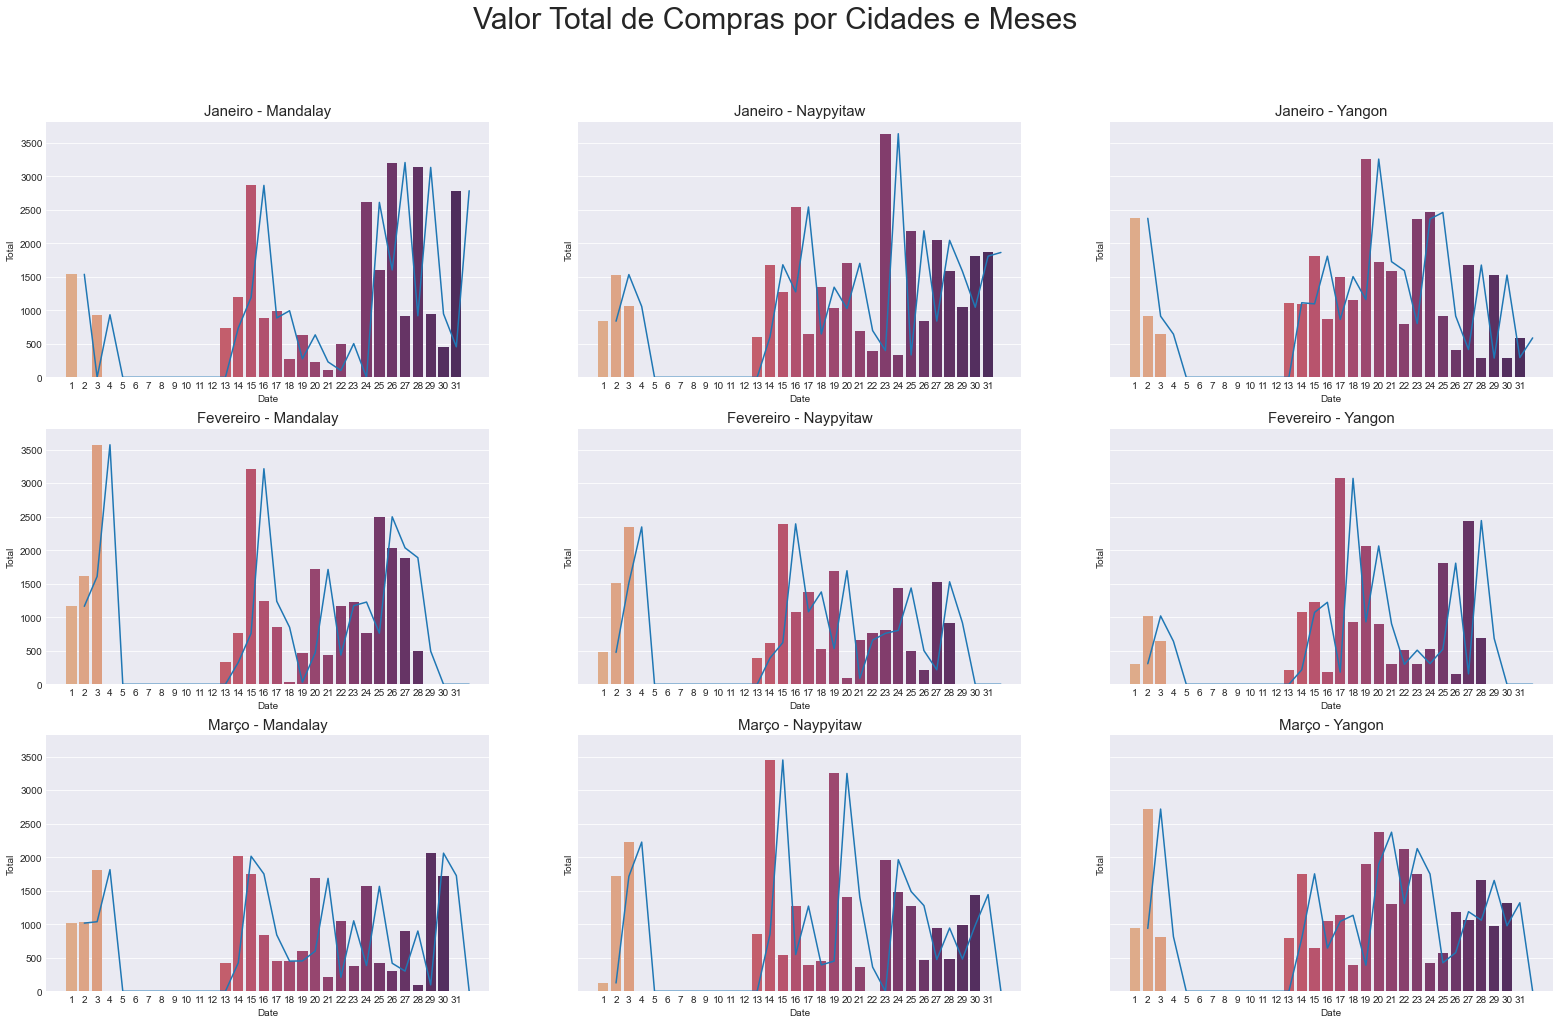

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(27, 16), sharey=True)
fig.suptitle('Valor Total de Compras por Cidades e Meses', fontsize=30)
    
# Month (0, 1, 2)
months = ['Janeiro', 'Fevereiro', 'Março']
for i, month in enumerate(months):
    total_month = df_supermarket.loc[df_supermarket['Date'].dt.month == i + 1]
    total_month['Date'] = total_month['Date'].dt.day
    total_month = total_month.groupby(['City', 'Date'])['Total'].sum().reset_index()
    
    # Cities (0, 1, 2)
    cities = ['Mandalay','Naypyitaw','Yangon']
    for j, city in enumerate(cities):
        total_month_city = total_month.loc[total_month['City'] == city]
                    
        for day in range(1,32):
            if not day in total_month_city['Date'].unique():
                new_data = {'City': city, 'Date': day, 'Total': 0}
                total_month_city = total_month_city.append(new_data, ignore_index=True)
        
        # Plot Month - City
        sns.barplot(ax=axes[i][j], x=total_month_city['Date'], y=total_month_city['Total'], palette='flare')
        sns.lineplot(ax=axes[i][j], x=total_month_city['Date'], y=total_month_city['Total'], palette='flare')
        axes[i][j].set_title(f'{month} - {city}', fontsize=15)

# Preparação para Machine Learning

### Remoção de colunas sem uso para ML 

In [17]:
df_supermarket.head(1)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [18]:
ml_supermarket = df_supermarket.drop(['Invoice ID', 'Date', 'Time'], axis=1)
ml_supermarket.head(10)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
5,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,Ewallet,597.73,4.761905,29.8865,4.1
6,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,Ewallet,413.04,4.761905,20.6520,5.8
7,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,Ewallet,735.60,4.761905,36.7800,8.0
8,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,Credit card,72.52,4.761905,3.6260,7.2
9,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,Credit card,164.52,4.761905,8.2260,5.9


### Conversão de valores categoricos em valores numericos

##### coluna BRANCH

In [19]:
ml_supermarket['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [20]:
ml_supermarket['Branch'] = ml_supermarket['Branch'].map({'A': 1, 'B': 2, 'C': 3})

##### coluna CITY

In [21]:
ml_supermarket['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [22]:
ml_supermarket['City'] = ml_supermarket['City'].map({'Yangon': 1, 'Mandalay': 2, 'Naypyitaw': 3,})

##### coluna CUSTOMER TYPE

In [23]:
ml_supermarket['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [24]:
ml_supermarket['Customer type'] = ml_supermarket['Customer type'].map({'Member': 1, 'Normal': 2})

##### coluna GENDER

In [25]:
ml_supermarket['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [26]:
ml_supermarket['Gender'] = ml_supermarket['Gender'].map({'Female': 1, 'Male': 2})

##### coluna PRODUCT LINE

In [27]:
ml_supermarket['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [28]:
ml_supermarket['Product line'] = ml_supermarket['Product line'].map({'Health and beauty': 1, 'Electronic accessories': 2, 
                                                                     'Home and lifestyle': 3, 'Sports and travel': 4,
                                                                     'Food and beverages': 5, 'Fashion accessories': 6})

##### coluna PAYMENT

In [29]:
ml_supermarket['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [30]:
ml_supermarket['Payment'] = ml_supermarket['Payment'].map({'Ewallet': 1, 'Cash': 2, 'Credit card': 3})

### Visualização ML

In [31]:
ml_supermarket.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,1,1,1,1,1,74.69,7,26.1415,548.9715,1,522.83,4.761905,26.1415,9.1
1,3,3,2,1,2,15.28,5,3.8200,80.2200,2,76.40,4.761905,3.8200,9.6
2,1,1,2,2,3,46.33,7,16.2155,340.5255,3,324.31,4.761905,16.2155,7.4
3,1,1,1,2,1,58.22,8,23.2880,489.0480,1,465.76,4.761905,23.2880,8.4
4,1,1,2,2,4,86.31,7,30.2085,634.3785,1,604.17,4.761905,30.2085,5.3


# MACHINE LEARNING UNSUPERVISED K-Means

In [32]:
import numpy as np #para manipular os vetores
from sklearn.cluster import KMeans #para usar o KMeans

##### Dados a serem agrupados

In [33]:
ml_array = np.array(ml_supermarket[['Rating', 'Total']])
ml_array

array([[  9.1   , 548.9715],
       [  9.6   ,  80.22  ],
       [  7.4   , 340.5255],
       ...,
       [  7.7   ,  33.432 ],
       [  4.1   ,  69.111 ],
       [  6.6   , 649.299 ]])

##### Dados plotados sem agrupamento

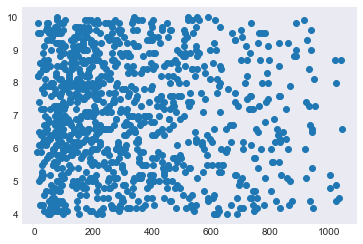

In [34]:
plt.scatter(ml_array[:,1], ml_array[:,0]) #posicionamento dos eixos x e y

plt.grid() #função que desenha a grade no nosso gráfico

##### Dados com o processo de agrupamento pelo K-means

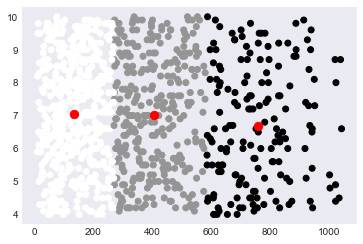

In [36]:
kmeans = KMeans(n_clusters = 3, #numero de clusters
init = 'k-means++', n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
max_iter = 500)#numero máximo de iterações

pred_y = kmeans.fit_predict(ml_array)

plt.scatter(ml_array[:,1], ml_array[:,0], c = pred_y) #posicionamento dos eixos x e y

plt.grid() #função que desenha a grade no nosso gráfico
plt.scatter(kmeans.cluster_centers_[:,1], 
            kmeans.cluster_centers_[:,0], 
            s = 70, c = 'red') #posição de cada centroide no gráfico
plt.show()